# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Import Sales Data

In [2]:
sales_df = pd.read_csv("sales.csv", dtype={'StateHoliday': 'object'})
sales_df.head(10)

# Id: transaction ID (combination of Store and date) 
# Store: unique store Id
# Sales: sales/day, this is the target variable 
# Customers: number of customers on a given day
# Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
# Promo: describes if store is running a promo on that day or not
# StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
# SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


# Import Store Information Data

In [5]:
store_info_df = pd.read_csv("store.csv")
store_info_df.head(10)

# StoreType: categorical variable to indicate type of store (a, b, c, d)
# Assortment: describes an assortment level: a = basic, b = extra, c = extended
# CompetitionDistance (meters): distance to closest competitor store
# CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
# Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
# Promo2Since [Year/Week]: date when the store started participating in Promo2
# PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [6]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# Explore Sales Dataset

<Axes: >

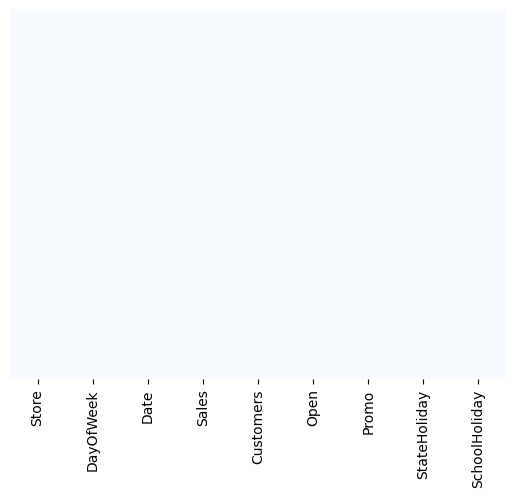

In [8]:
# Check for missing data
sns.heatmap(sales_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

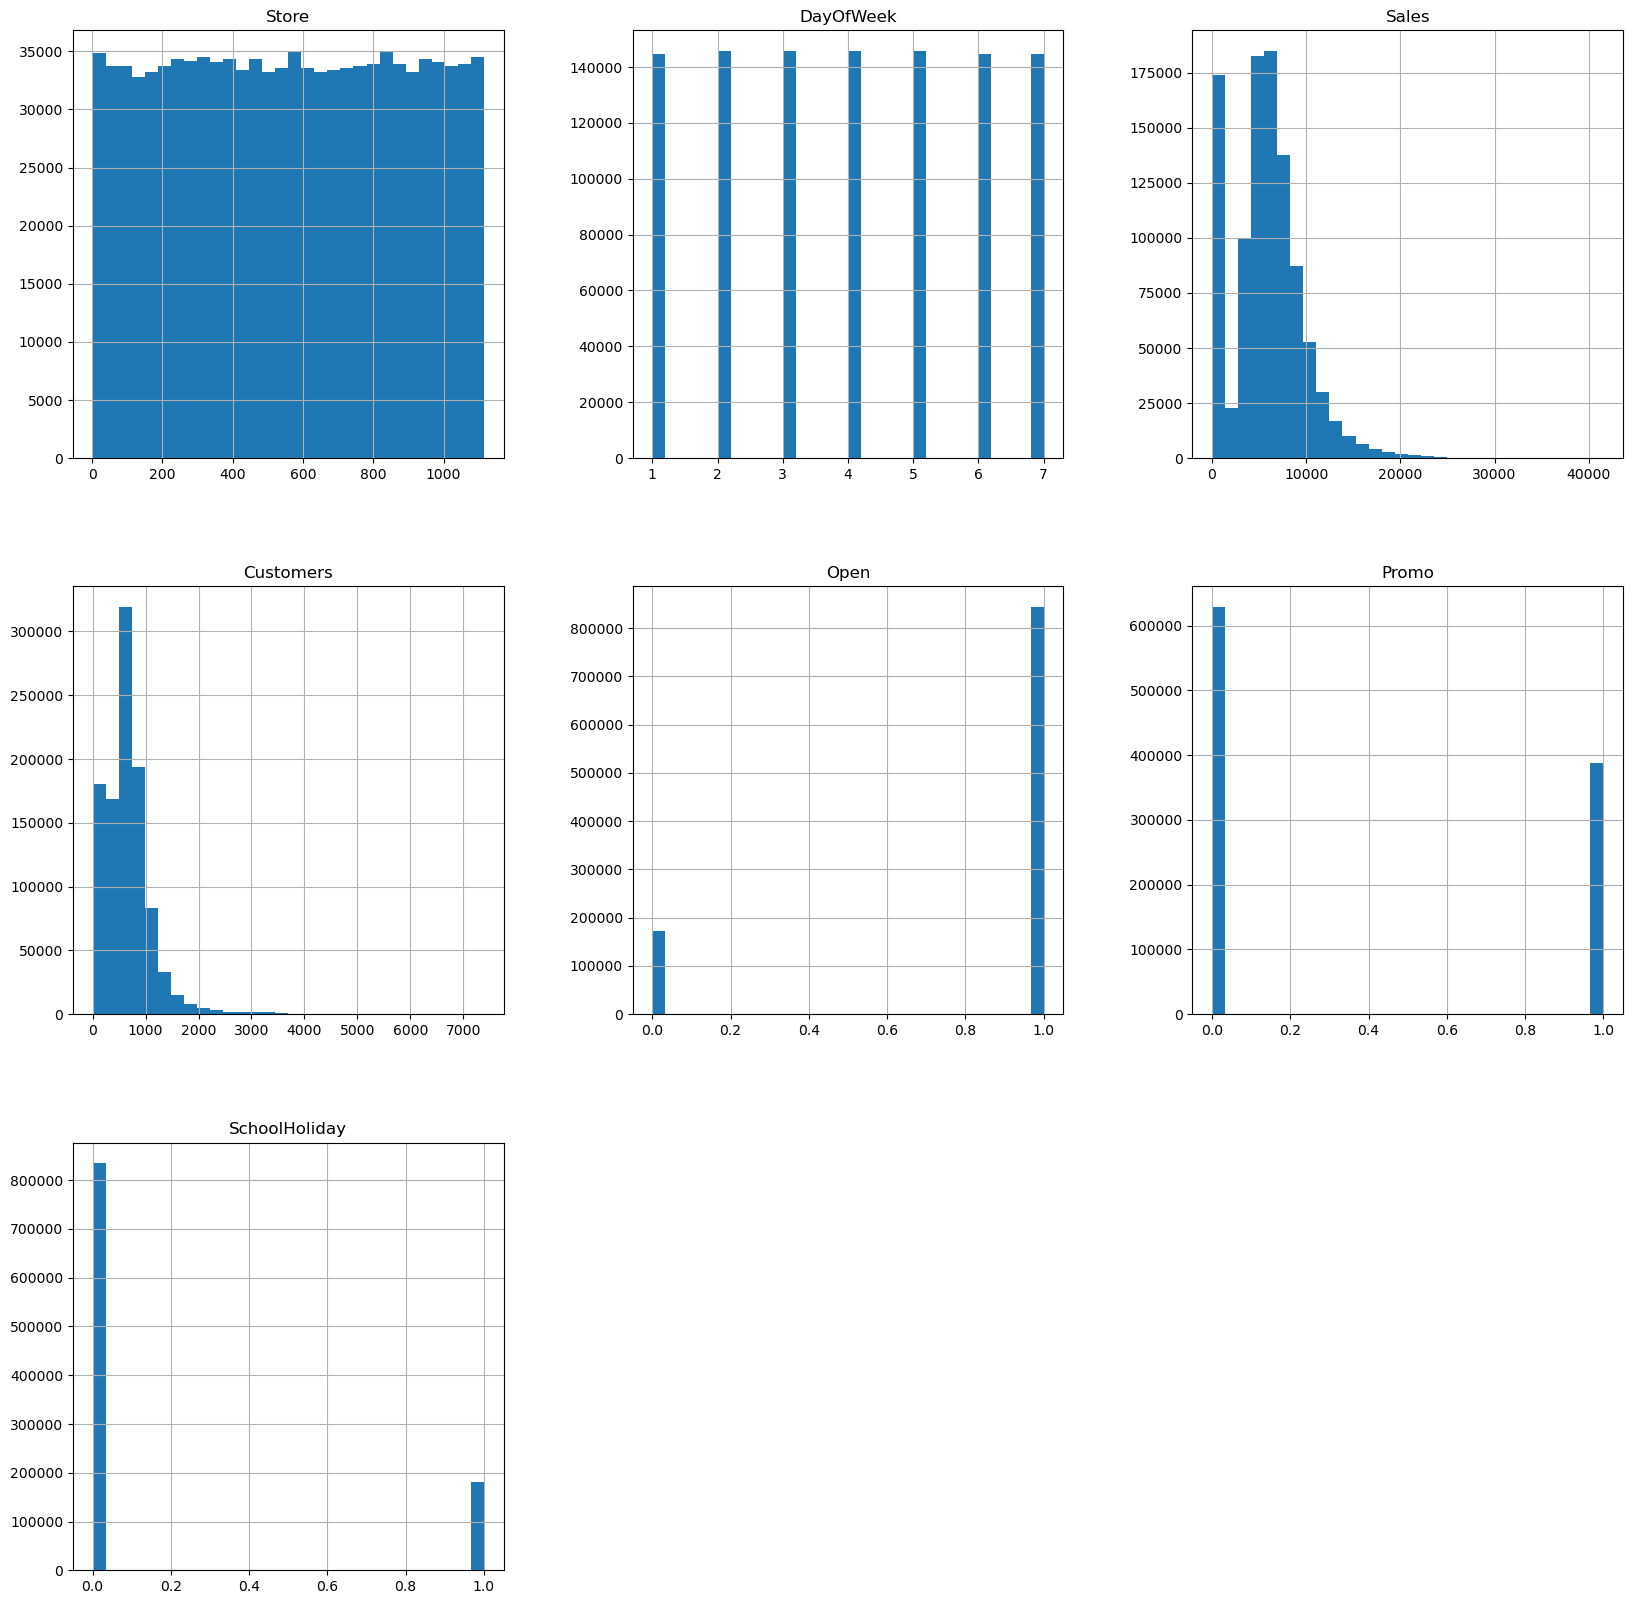

In [9]:
# Plot the distribution of features
sales_df.hist(bins=30, figsize=(20,20))

In [10]:
# Keep only the rows where a store is open

sales_df = sales_df.loc[sales_df["Open"] == 1]
sales_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [11]:
# Drop "Open" column

sales_df.drop(["Open"], axis=1, inplace=True)
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [12]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


# Explore Store Information Dataset

<Axes: >

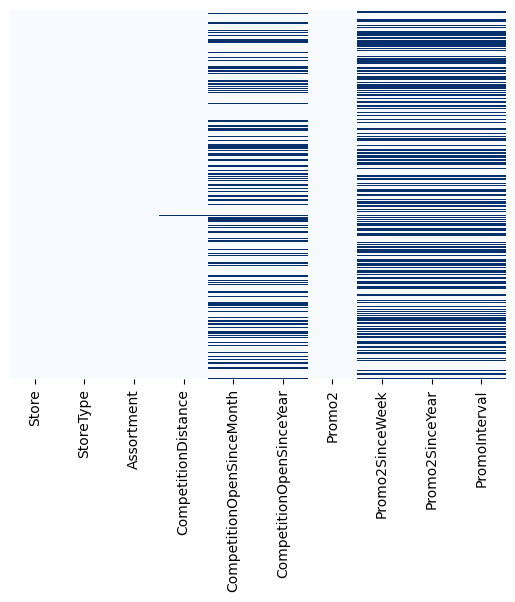

In [13]:
# Check for missing data
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [14]:
# Show missing data from "CompetitionDistance" column

store_info_df.loc[store_info_df["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [15]:
# Replace missing data

NaN_cols = ["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"]

for col in NaN_cols:
    store_info_df[col].fillna(0, inplace=True)
    
store_info_df["CompetitionDistance"].fillna(store_info_df["CompetitionDistance"].mean(), inplace=True)

<Axes: >

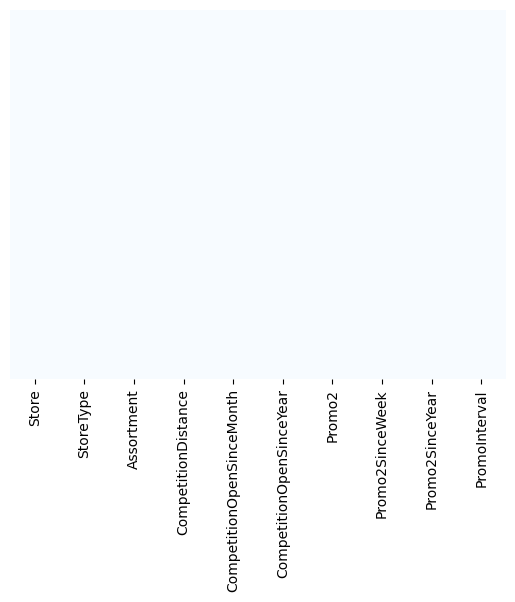

In [16]:
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

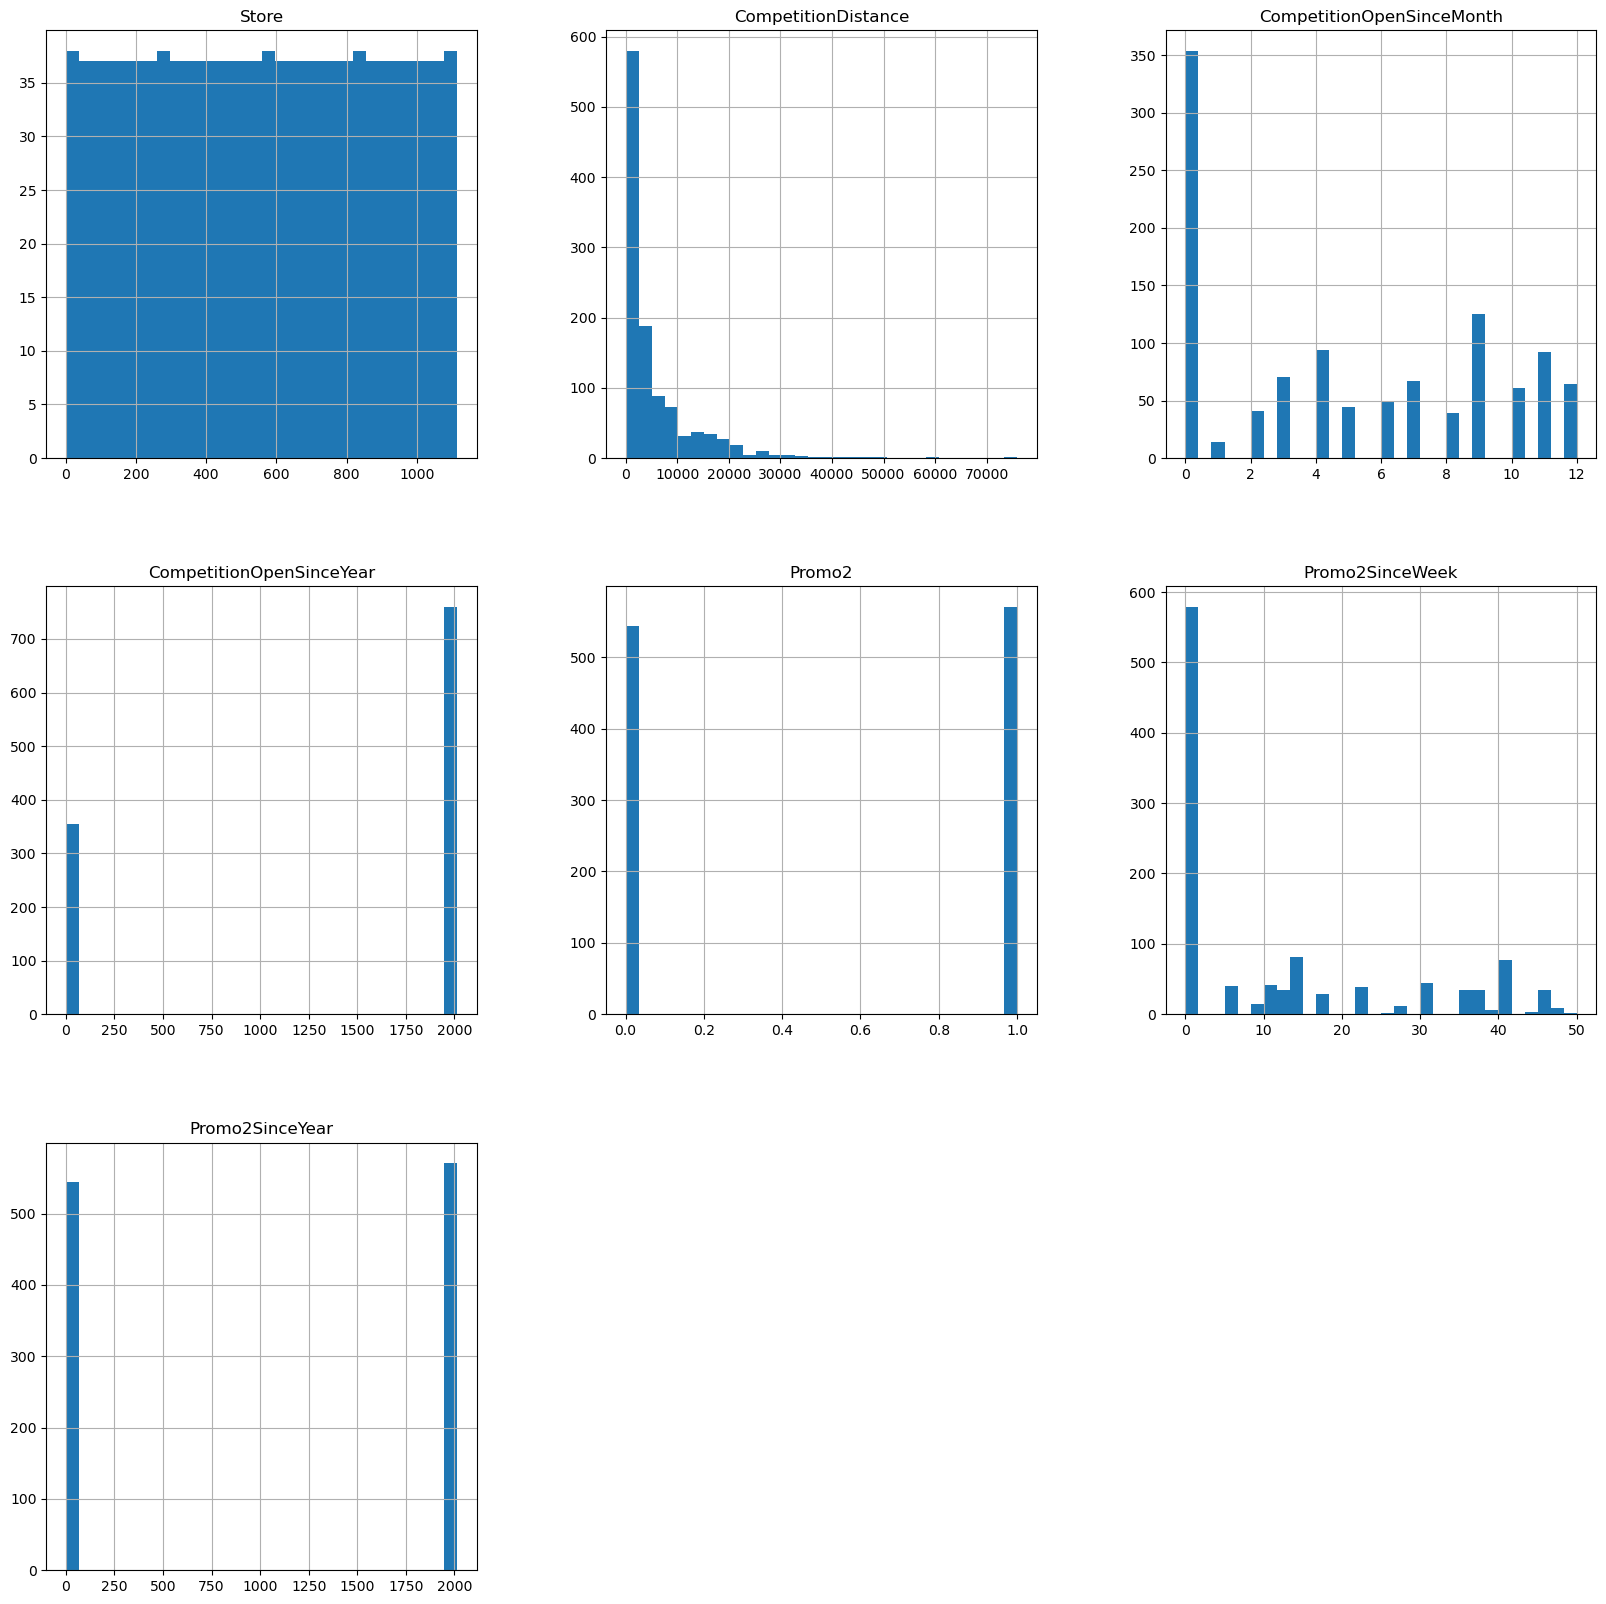

In [17]:
# Plot the distribution of features
store_info_df.hist(bins=30, figsize=(20,20))

# Merge the Two Datasets

In [18]:
sales_complete_df = pd.merge(sales_df, store_info_df, how='inner', on='Store')
sales_complete_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


# Explore Merged Dataset

In [19]:
# Show correlation of features with target variable ("Sales")

correlation = sales_complete_df.corr(numeric_only=True)["Sales"].sort_values()
correlation

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

<Axes: >

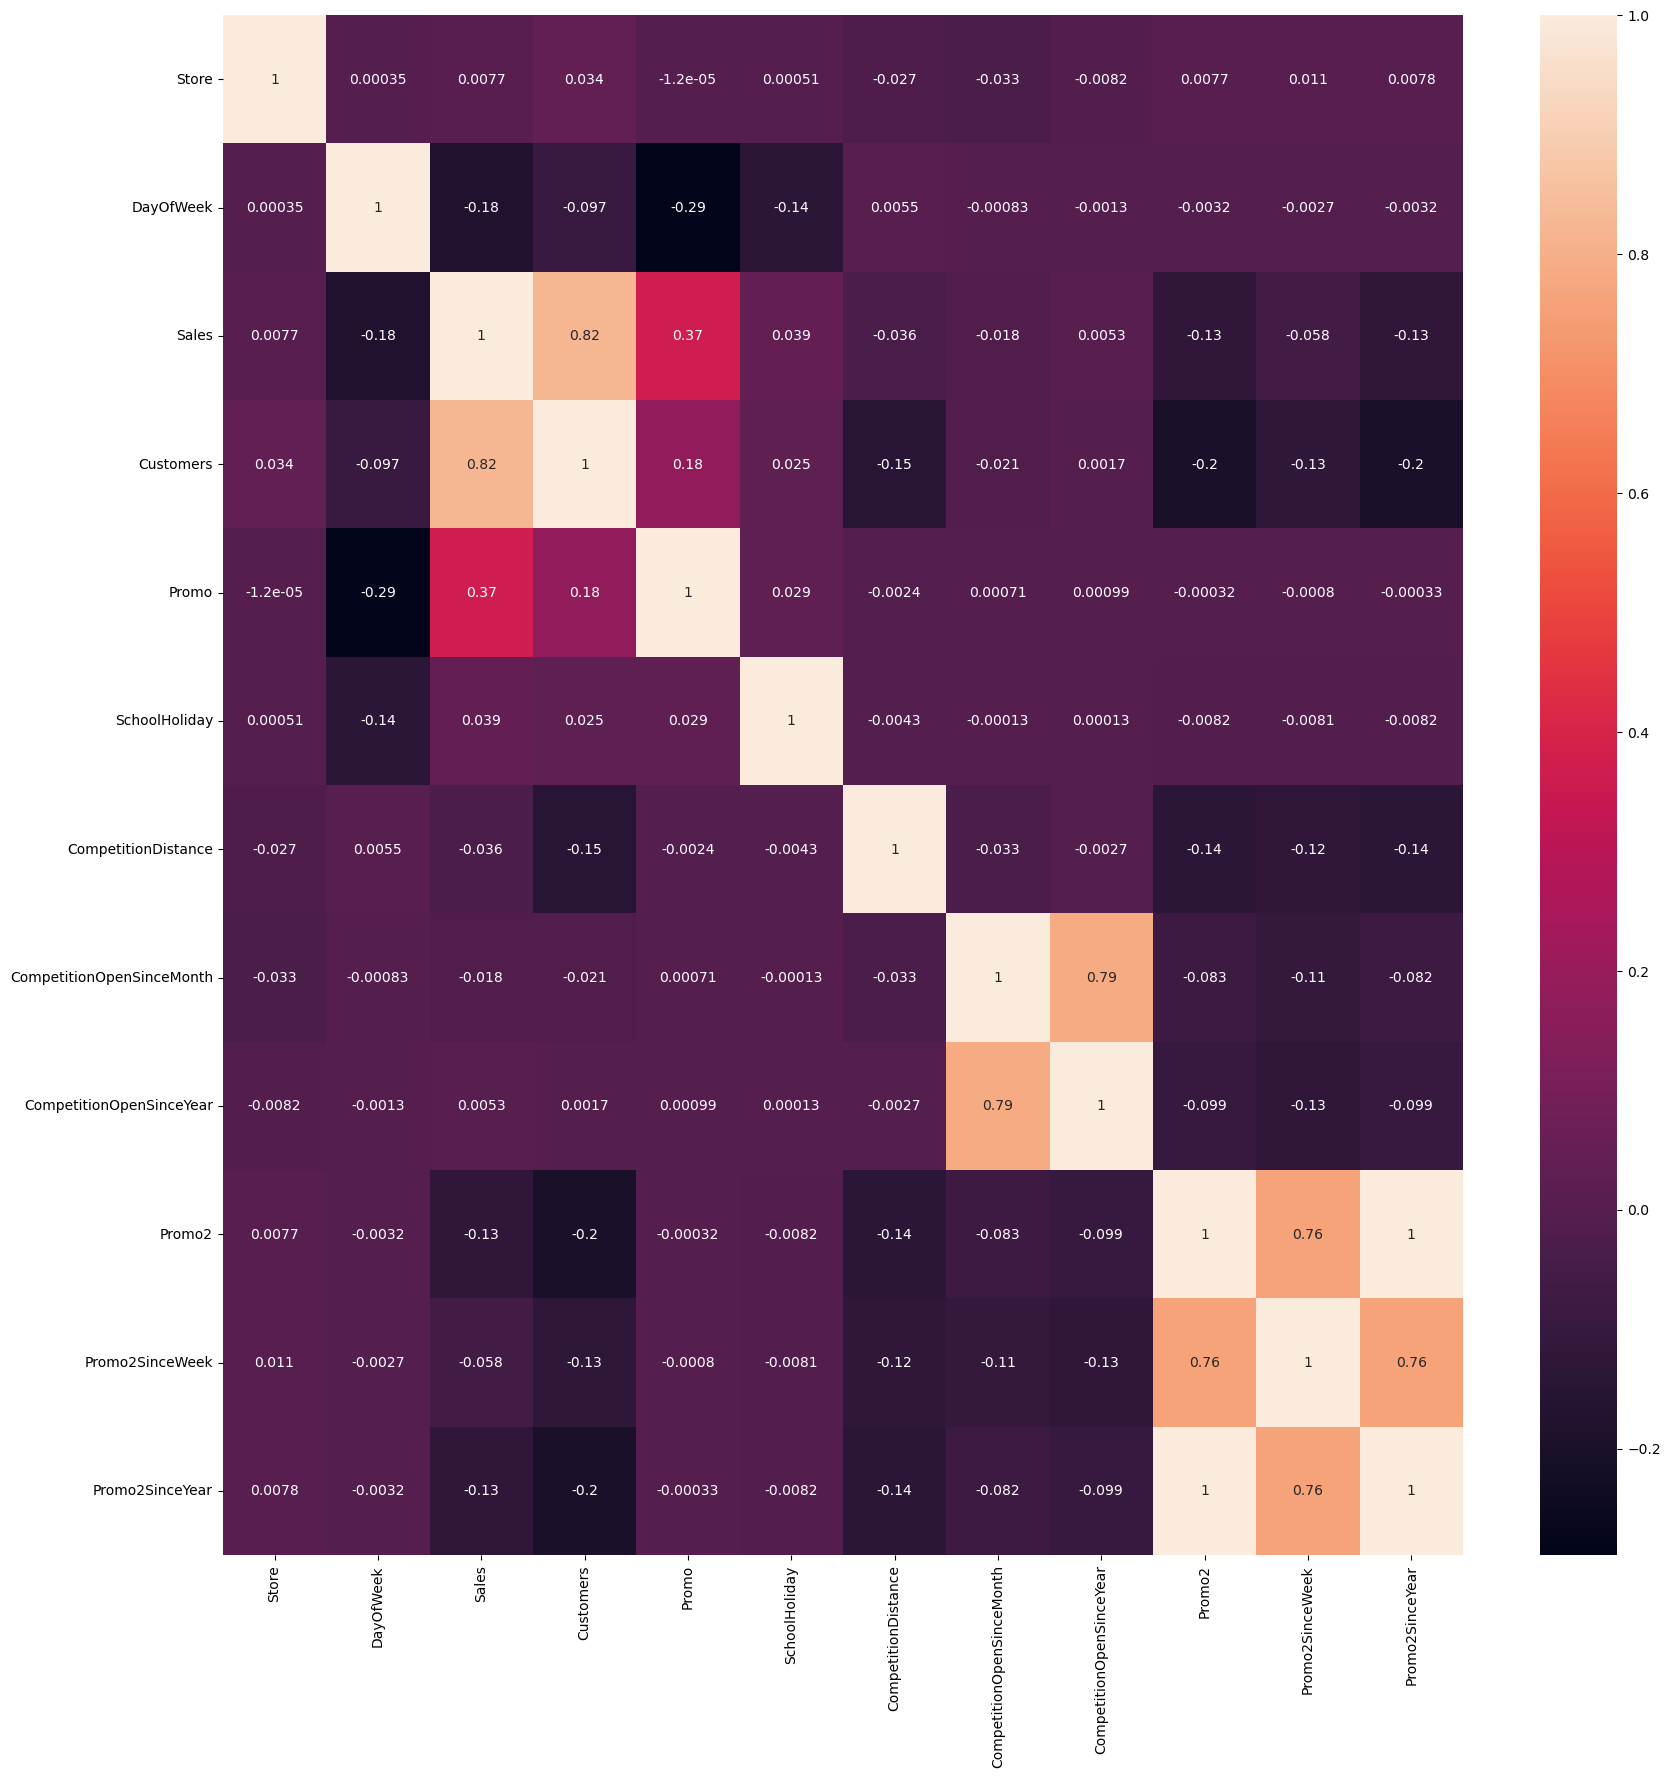

In [20]:
# Visualize correlation between features

correlation = sales_complete_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlation, annot=True)

In [21]:
# Extract year, month and day from date

sales_complete_df["Year"] = pd.DatetimeIndex(sales_complete_df["Date"]).year
sales_complete_df["Month"] = pd.DatetimeIndex(sales_complete_df["Date"]).month
sales_complete_df["Day"] = pd.DatetimeIndex(sales_complete_df["Date"]).day

sales_complete_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,7
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,5
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,4
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,3


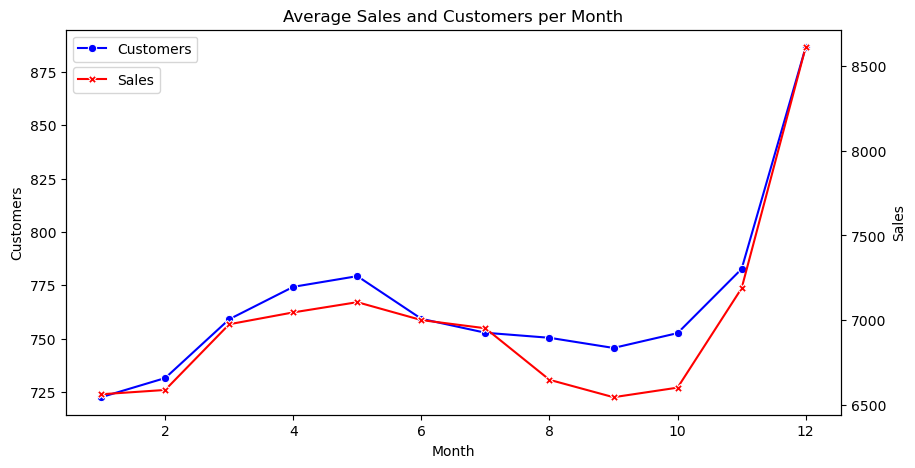

In [22]:
# Show the average sales and customers per month

month_pivot = pd.pivot_table(sales_complete_df, values=['Sales','Customers'], index=['Month'], aggfunc="mean")

fig, ax = plt.subplots(figsize = (10, 5))
plt.title("Average Sales and Customers per Month")

ax2 = ax.twinx()  # secondary y-axis

sns.lineplot(month_pivot, x='Month', y='Customers', ax=ax, marker='o', color='b', label='Customers')
sns.lineplot(month_pivot, x='Month', y='Sales', ax=ax2, marker='X', color='r', label='Sales')

ax.legend()
ax2.legend(bbox_to_anchor=(0.13, 0.92))

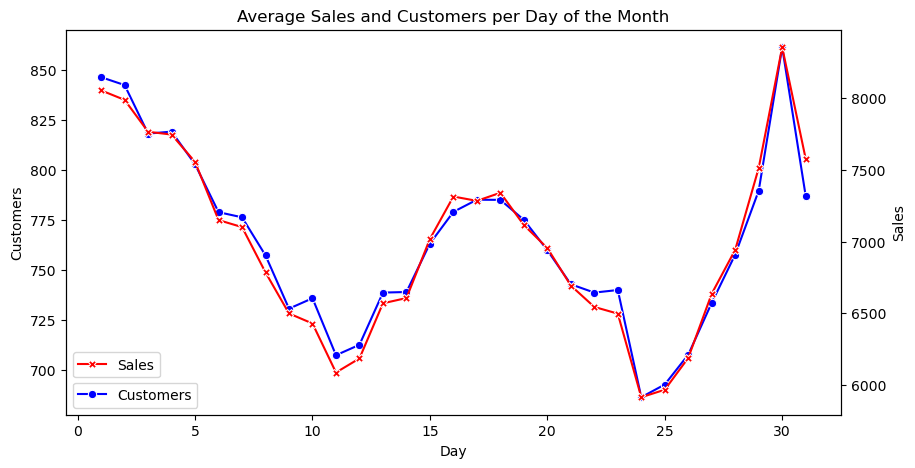

In [23]:
# Show the average sales and customers per day of the month

day_pivot = pd.pivot_table(sales_complete_df, values=['Sales','Customers'], index=['Day'], aggfunc="mean")

fig, ax = plt.subplots(figsize = (10, 5))
plt.title("Average Sales and Customers per Day of the Month")

ax2 = ax.twinx()  # secondary y-axis

sns.lineplot(day_pivot, x='Day', y='Customers', ax=ax, marker='o', color='b', label='Customers')
sns.lineplot(day_pivot, x='Day', y='Sales', ax=ax2, marker='X', color='r', label='Sales')

ax.legend(loc='lower left')
ax2.legend(bbox_to_anchor=(0.13, 0.18))

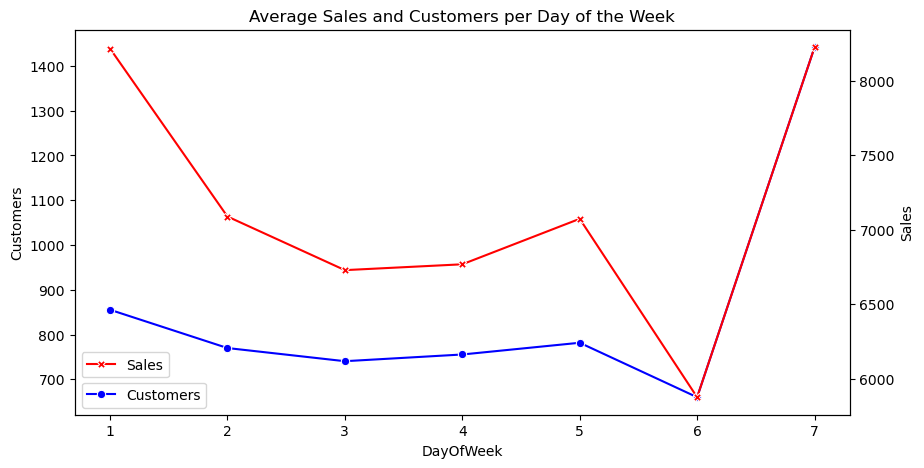

In [24]:
# Show the average sales and customers per day of the week

weekday_pivot = pd.pivot_table(sales_complete_df, values=['Sales','Customers'], index=['DayOfWeek'], aggfunc="mean")

fig, ax = plt.subplots(figsize = (10, 5))
plt.title("Average Sales and Customers per Day of the Week")

ax2 = ax.twinx()  # secondary y-axis

sns.lineplot(weekday_pivot, x='DayOfWeek', y='Customers', ax=ax, marker='o', color='b', label='Customers')
sns.lineplot(weekday_pivot, x='DayOfWeek', y='Sales', ax=ax2, marker='X', color='r', label='Sales')

ax.legend(loc='lower left')
ax2.legend(bbox_to_anchor=(0.13, 0.18))

In [25]:
# Show the average sales through time for each store type

store_pivot = pd.pivot_table(sales_complete_df, values='Sales', index='Date', columns='StoreType', aggfunc="mean")
store_pivot

StoreType,a,b,c,d
Date,,,,
2013-01-01,2907.000000,5895.500000,NaN,NaN
2013-01-02,6512.269103,7651.312500,6372.714286,5694.315029
2013-01-03,5870.261231,7363.562500,5747.657534,5383.867052
2013-01-04,6007.013311,7858.533333,6092.184932,5842.202312
2013-01-05,4940.978333,6480.533333,6266.267123,5707.869942
...,...,...,...,...
2015-07-27,9339.706667,11993.588235,9661.804054,9970.201149
2015-07-28,8183.773333,11009.117647,8151.304054,8078.336207
2015-07-29,7540.651667,10840.588235,7646.945946,7642.336207


<Axes: title={'center': 'Average Sales Through Time'}, xlabel='Date'>

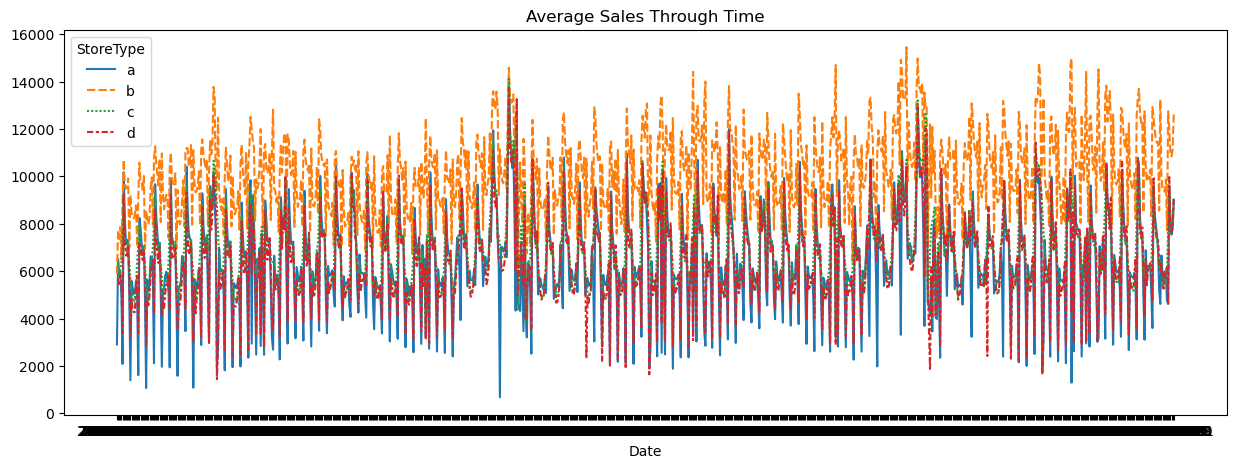

In [26]:
fig, ax = plt.subplots(figsize = (15, 5))
plt.title("Average Sales Through Time")

sns.lineplot(store_pivot)

<Axes: xlabel='Promo', ylabel='Customers'>

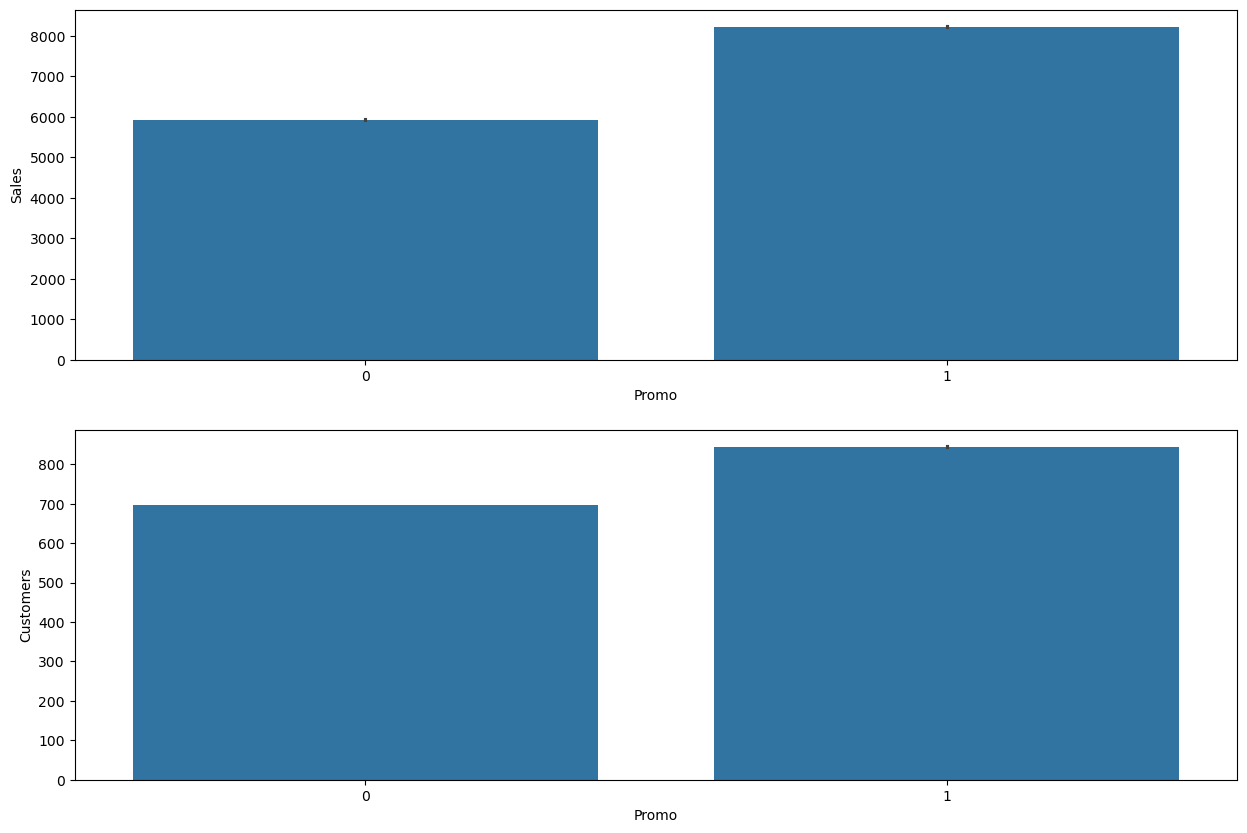

In [27]:
# Show the effect of promotions on sales and number of customers

plt.figure(figsize=[15, 10])

plt.subplot(211)
sns.barplot(sales_complete_df, x='Promo', y='Sales')
plt.subplot(212)
sns.barplot(sales_complete_df, x='Promo', y='Customers')

<Axes: xlabel='Promo', ylabel='Customers'>

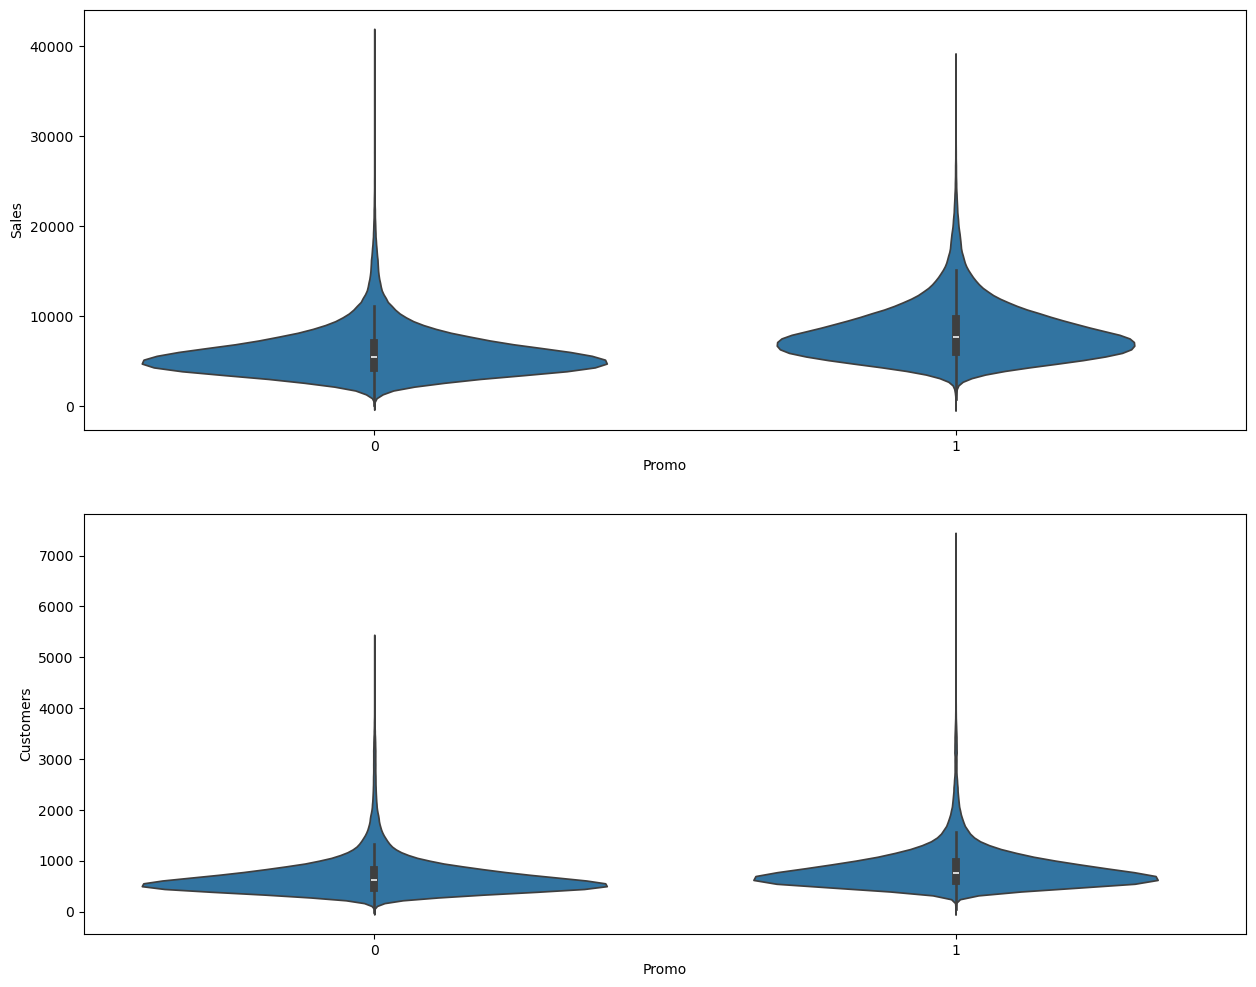

In [28]:
# Plot the distribution of sales and customers on promo days

plt.figure(figsize=[15, 12])

plt.subplot(211)
sns.violinplot(sales_complete_df, x='Promo', y='Sales')
plt.subplot(212)
sns.violinplot(sales_complete_df, x='Promo', y='Customers')

# Make Future Prediction Using Facebook Prophet

In [29]:
from prophet import Prophet

In [30]:
# Define prediction function

def sales_prediction(store_ID, sales_df, holidays, periods):
    
    sales_df = sales_df.loc[sales_df['Store'] == store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values('ds')
    
    model = Prophet(holidays=holidays)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    figure1 = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure2 = model.plot_components(forecast)

In [31]:
# Get school holiday dates

school_holiday_dates = sales_complete_df.loc[sales_complete_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holiday_dates

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [32]:
# Get state holiday dates

state_holiday_dates = sales_complete_df.loc[(sales_complete_df['StateHoliday'] == 'a') |
                                       (sales_complete_df['StateHoliday'] == 'b') |
                                       (sales_complete_df['StateHoliday'] == 'c')
                                      ].loc[:, 'Date'].values
state_holiday_dates

array(['2014-10-03', '2013-10-03', '2015-06-04', '2014-06-19',
       '2013-05-30', '2015-06-04', '2014-06-19', '2013-05-30',
       '2014-10-03', '2013-10-03', '2015-05-01', '2014-10-31',
       '2014-05-01', '2013-10-03', '2013-05-01', '2015-06-04',
       '2014-06-19', '2013-05-30', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-08-15', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-08-15', '2013-08-15', '2015-05-25',
       '2015-05-14', '2015-05-01', '2015-04-06', '2015-04-03',
       '2015-01-01', '2014-12-26', '2014-12-25', '2014-10-03',
       '2014-06-09', '2014-05-29', '2014-05-01', '2014-04-21',
       '2014-04-18', '2014-01-01', '2013-12-26', '2013-12-25',
       '2013-10-03', '2013-05-20', '2013-05-09', '2013-05-01',
       '2013-04-01', '2013-03-29', '2013-01-01', '2014-10-03',
       '2015-06-04', '2014-06-19', '2013-05-30', '2015-06-04',
       '2014-06-19', '2013-05-30', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-10-03', '2014-10-03', '2013-

In [33]:
# Create holidays dataframe

state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holiday_dates),
                               'holiday': 'state_holiday'
                              })

school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holiday_dates),
                               'holiday': 'school_holiday'
                              })

holidays = pd.concat((state_holidays, school_holidays))
holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


18:00:11 - cmdstanpy - INFO - Chain [1] start processing
18:00:11 - cmdstanpy - INFO - Chain [1] done processing


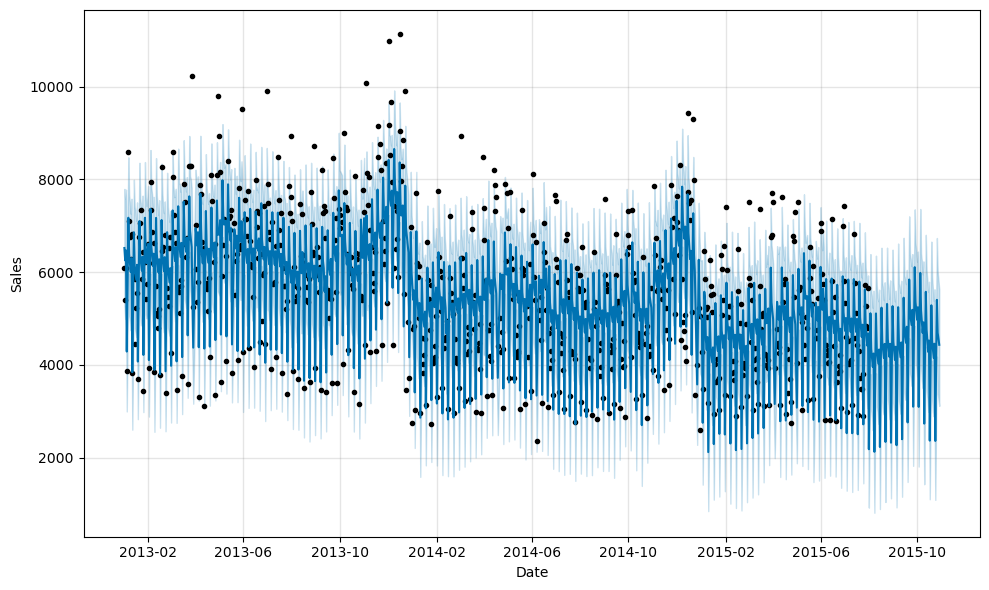

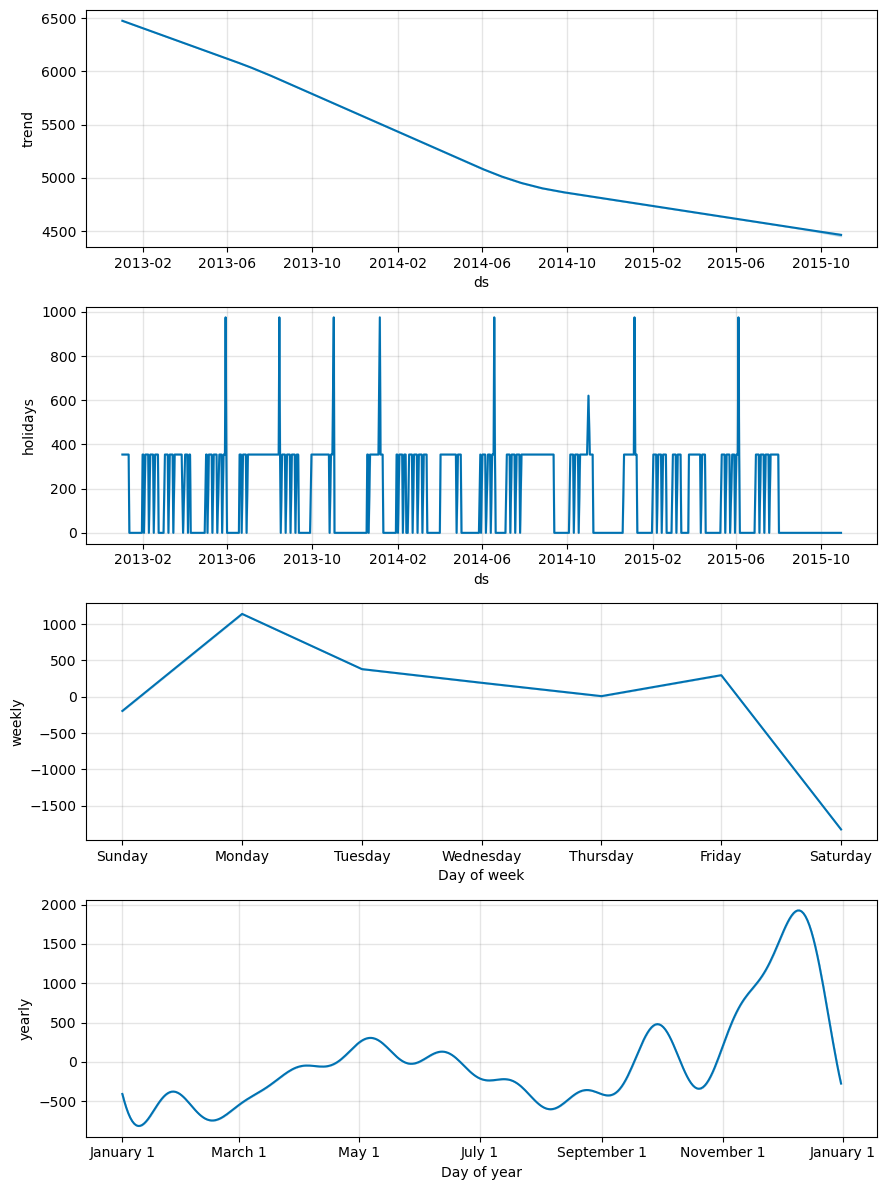

In [34]:
# Generate forecast for store 6, 90 days into the future

sales_prediction(6, sales_complete_df, holidays, 90)